# Scrap Notebook 
Used Jupyter to expirement with running parts of the code and testing different techniques. Final code in Pt2 Py file.

In [6]:
import json
with open('data/transcript1.json', 'r') as file:
    data = json.load(file)
print(data["transcription_sentences"])

[{'index': 1, 'speaker': 'sales_rep', 'timestamp_start': '00:00:02', 'timestamp_end': '00:00:07', 'text': 'Hi, is this Alex? Hi, this is Jordan from MongoDB. Do you have a minute to chat about your database strategy for gaming?'}, {'index': 2, 'speaker': 'prospect', 'timestamp_start': '00:00:07', 'timestamp_end': '00:00:10', 'text': 'Uh, sure, but I have a meeting soon. Can you be quick?'}, {'index': 3, 'speaker': 'sales_rep', 'timestamp_start': '00:00:10', 'timestamp_end': '00:00:14', 'text': 'Absolutely. I saw your team just went through a data compliance review—is that right?'}, {'index': 4, 'speaker': 'prospect', 'timestamp_start': '00:00:14', 'timestamp_end': '00:00:17', 'text': 'Yeah, that’s right. We’re reviewing our stack, but we’re on Snowflake. It’s doing what we need.'}, {'index': 5, 'speaker': 'sales_rep', 'timestamp_start': '00:00:17', 'timestamp_end': '00:00:23', 'text': 'Totally understood. A lot of gaming teams use Snowflake for analytics. Have you run into any challeng

In [7]:
print(data["transcription_sentences"][0]['text'])

Hi, is this Alex? Hi, this is Jordan from MongoDB. Do you have a minute to chat about your database strategy for gaming?


In [20]:
tokenized = data["transcription_sentences"][14]['text'].split()
print(tokenized)

['Totally', 'get', 'it.', 'Thanks', 'for', 'your', 'time,', 'Alex.', 'Have', 'a', 'great', 'day', 'and', 'good', 'luck', 'with', 'your', 'launch!']


In [28]:
t1list =[]
for sentence in data["transcription_sentences"]:
    t1list += sentence['text'].split()
print(t1list)

['Hi,', 'is', 'this', 'Alex?', 'Hi,', 'this', 'is', 'Jordan', 'from', 'MongoDB.', 'Do', 'you', 'have', 'a', 'minute', 'to', 'chat', 'about', 'your', 'database', 'strategy', 'for', 'gaming?', 'Uh,', 'sure,', 'but', 'I', 'have', 'a', 'meeting', 'soon.', 'Can', 'you', 'be', 'quick?', 'Absolutely.', 'I', 'saw', 'your', 'team', 'just', 'went', 'through', 'a', 'data', 'compliance', 'review—is', 'that', 'right?', 'Yeah,', 'that’s', 'right.', 'We’re', 'reviewing', 'our', 'stack,', 'but', 'we’re', 'on', 'Snowflake.', 'It’s', 'doing', 'what', 'we', 'need.', 'Totally', 'understood.', 'A', 'lot', 'of', 'gaming', 'teams', 'use', 'Snowflake', 'for', 'analytics.', 'Have', 'you', 'run', 'into', 'any', 'challenges', 'supporting', 'in-game', 'data', 'or', 'global', 'workloads?', 'Not', 'really.', 'Performance', 'has', 'been', 'solid.', 'And', 'we', 'just', 'invested', 'a', 'lot', 'in', 'setting', 'it', 'up,', 'so', 'we’re', 'not', 'looking', 'to', 'swap', 'out,', 'honestly.', 'That', 'makes', 'sense.', 

In [52]:
import re
import nltk

# nltk.download('stopwords') #Uncomment when downloading stopwords file locally

stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"[’']", "", w) for w in stop_words} # Remove apostrophes from stopwords
domain_words = {"mongodb", "database", "collection", "document", "cloud", "data", "hi", "hey", "yeah", "like"} # Domain specific generic words
stop_words = stop_words | domain_words # combine to one list of stop_words

def read_record(filename)->list:
    """Returns a list of all the words in the given transcript"""
    with open(filename, 'r') as file:
        data = json.load(file)
    wordlist =[]
    for sentence in data["transcription_sentences"]:
        wordlist += sentence['text'].split()
    print(wordlist)    
    return wordlist

def clean_data(wordlist)->list:
    """
    Takes in a list and returns a copy clean of:
    - Remove punctuation
    - Lowercase all words
    - Remove NLDK stop words and domain specific terminology
    """
    cleaned = []
    for word in wordlist:
        word = word.lower()
        # Used GPT for help formatting RegEx
        word = re.sub(r'[—–-]', ' ', word) # Split em dashes and dashes into separated words
        tokens = word.split() # Handles words that were previously combined with dashes 
        for token in tokens:
                token = re.sub(r'[^\w\s]', '', token)  # Removes punctuation
                # Filter out stopwords and empty strings
                if token and token not in stop_words:
                    cleaned.append(token)
    return cleaned


wordlist = read_record("data/transcript2.json")
cleaned = clean_data(wordlist)
print(cleaned)

['Hi,', 'this', 'is', 'Alex', 'from', 'MongoDB.', 'Is', 'this', 'Chris?', 'Yeah,', 'this', 'is', 'Chris.', 'What', 'can', 'I', 'do', 'for', 'you?', 'Hey', 'Chris,', 'thanks', 'for', 'taking', 'the', 'call—I’ll', 'keep', 'it', 'brief.', 'I', 'saw', 'your', 'team', 'was', 'recently', 'reviewing', 'data', 'compliance', 'processes,', 'and', 'I', 'wanted', 'to', 'see', 'if', 'you’ve', 'considered', 'MongoDB', 'Atlas', 'for', 'your', 'gaming', 'backend.', 'We’re', 'actually', 'pretty', 'happy', 'on', 'MySQL', 'right', 'now.', 'Switching', 'databases', 'seems', 'like', 'a', 'massive', 'lift,', 'so...', 'not', 'really', 'interested,', 'to', 'be', 'honest.', 'I', 'totally', 'get', 'that.', 'Migration', 'can', 'feel', 'daunting.', 'Just', 'curious—are', 'there', 'any', 'challenges', 'with', 'scaling', 'player', 'data', 'or', 'managing', 'compliance', 'with', 'your', 'current', 'stack', 'that', 'keep', 'popping', 'up?', 'Honestly?', 'Not', 'really.', 'We’ve', 'been', 'able', 'to', 'handle', 'our'

In [47]:
print(stop_words)

{'he', 'in', 'you', 'can', 'isn', 'to', 'ourselves', 'each', "should've", 'again', "you've", 'no', "she's", 'hadn', 'has', 'o', 'only', 'that', 'a', 'is', "he's", "won't", 'their', "didn't", "he'd", "he'll", 'nor', 'aren', 'during', "doesn't", 'd', 'further', 'themselves', 'just', 'what', 'under', 'with', 'y', "wasn't", "hasn't", 'than', "weren't", 'm', "she'll", 'myself', 'hasn', 'very', 'we', 'do', 'out', 'then', 'these', 'it', 'down', "you're", 'not', 'himself', "aren't", "couldn't", "mustn't", 't', 'theirs', 'from', 'hers', 'doing', 'how', 'mightn', 'once', 'she', 'those', 'up', "you'd", 'having', 'been', 'over', 'be', 'which', "we've", "don't", 'on', 'shouldn', "needn't", 'before', 'of', 'most', 'will', 'when', 's', 'few', 'until', 'me', "i'm", 'same', 'because', "we're", 'i', 'ours', 'but', 'after', 'off', 'all', 'ain', "they've", 'and', "shan't", 'herself', 'couldn', 'by', 'weren', 'any', 'needn', 'did', 'wasn', 'where', 'about', "it'd", "you'll", 'your', 'had', 'our', 'yours', 

In [53]:
import os
for filename in os.listdir('data'):
    print(filename)

transcript23.json
transcript19.json
transcript7.json
transcript15.json
transcript14.json
transcript6.json
transcript18.json
transcript22.json
transcript13.json
transcript25.json
transcript1.json
transcript24.json
transcript12.json
transcript11.json
transcript3.json
transcript2.json
transcript10.json
transcript5.json
transcript21.json
transcript9.json
transcript17.json
transcript16.json
transcript8.json
transcript20.json
transcript4.json


In [61]:
from collections import Counter
counts = dict(Counter(cleaned))
print(counts)

Counter({'chris': 4, 'compliance': 4, 'atlas': 4, 'really': 4, 'thanks': 3, 'mysql': 3, 'us': 3, 'keep': 2, 'team': 2, 'see': 2, 'gaming': 2, 'happy': 2, 'right': 2, 'get': 2, 'migration': 2, 'stack': 2, 'load': 2, 'tooling': 2, 'offer': 2, 'thats': 2, 'alex': 1, 'taking': 1, 'call': 1, 'brief': 1, 'saw': 1, 'recently': 1, 'reviewing': 1, 'processes': 1, 'wanted': 1, 'considered': 1, 'backend': 1, 'actually': 1, 'pretty': 1, 'switching': 1, 'databases': 1, 'seems': 1, 'massive': 1, 'lift': 1, 'interested': 1, 'honest': 1, 'totally': 1, 'feel': 1, 'daunting': 1, 'curious': 1, 'challenges': 1, 'scaling': 1, 'player': 1, 'managing': 1, 'current': 1, 'popping': 1, 'honestly': 1, 'able': 1, 'handle': 1, 'spikes': 1, 'mostly': 1, 'process': 1, 'makes': 1, 'sense': 1, 'built': 1, 'security': 1, 'controls': 1, 'automated': 1, 'saves': 1, 'engineering': 1, 'hours': 1, 'price': 1, 'looked': 1, 'costs': 1, 'ramp': 1, 'quick': 1, 'cost': 1, 'sensitive': 1, 'fair': 1, 'flexible': 1, 'tiers': 1, 'ev

In [76]:
import re
import json
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords

# nltk.download('stopwords', download_dir='.') #Uncomment when downloading stopwords file locally
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"[’']", "", w) for w in stop_words} # Remove apostrophes from stopwords
domain_words = {"mongodb", "database", "collection", "document", "cloud", "data", "hi", "hey", "yeah", "like", "zhi", "arjun", "acme corp.", "acme"} # Domain specific generic words
stop_words = stop_words | domain_words # combine to one list of stop_words

def read_record(filename)->list:
    """Returns a list of all the words in the given transcript"""
    with open(filename, 'r') as file:
        data = json.load(file)
    wordlist =[]
    for sentence in data["transcription_sentences"]:
        wordlist += sentence['text'].split()  
    return wordlist

def clean_data(wordlist)->list:
    """
    Takes in a list and returns a copy clean of:
    - Remove punctuation
    - Lowercase all words
    - Remove NLDK stop words and domain specific terminology
    """
    cleaned = []
    for word in wordlist:
        word = word.lower()
        # Used GPT for help formatting RegEx
        word = re.sub(r'[—–-]', ' ', word) # Split em dashes and dashes into separated words
        tokens = word.split() # Handles words that were previously combined with dashes 
        
        # Handles cases where words were split or not 
        for token in tokens:
                token = re.sub(r'[^\w\s]', '', token)  # Removes punctuation
                # Filter out stopwords and empty strings
                if token and token not in stop_words:
                    cleaned.append(token)
    return cleaned

def get_tf(word, document:list)->float:
    t = 0
    for _ in document:
        if _ == word:
            t += 1
    return (t/len(document))

def get_idf(word, )->float:
    """Checks"""


def get_avg_word_len(wordlist)->float:
    letters = 0
    for word in wordlist:
        letters += len(word)
    return(letters/len(wordlist))

def main():
    """
    
    """
    # Create dictionaries with wordlists for the transcripts 
    transcripts = {}
    for filename in os.listdir('data'):
        transcripts[filename] = read_record(f"data/{filename}")
    
    clean_transcripts = {}
    for key, value in transcripts.items():
        text = clean_data(value)  # calls the cleaning function
        counts = dict(Counter(text))  # Count cleaned words
        clean_transcripts[key] = {
            "text": text,
            "counts": counts
        }
    print(clean_transcripts["transcript1.json"])
    print(len(clean_transcripts))


if __name__ == "__main__":
    main()


{'text': ['still', 'good', 'time', 'chat', 'minutes', 'uh', 'yes', 'spare', 'minutes', 'whats', 'regarding', 'thanks', 'keep', 'brief', 'saw', 'corp', 'quite', 'bit', 'microservices', 'lately', 'curious', 'hows', 'current', 'setup', 'holding', 'especially', 'dynamodb', 'itsokay', 'guess', 'relied', 'dynamo', 'solid', 'services', 'gotten', 'trickier', 'manage', 'across', 'teams', 'thats', 'something', 'hear', 'lot', 'things', 'become', 'distributed', 'gets', 'complicated', 'different', 'teams', 'unique', 'right', 'atlas', 'could', 'help', 'get', 'flexibility', 'especially', 'rapid', 'adtech', 'workloads', 'mhm', 'honestly', 'bit', 'cautious', 'finished', 'big', 'migration', 'dynamo', 'long', 'ago', 'worried', 'uh', 'vendor', 'lock', 'migration', 'headaches', 'totally', 'makes', 'sense', 'clarify', 'atlas', 'runs', 'aws', 'azure', 'gcp', 'ever', 'want', 'keep', 'things', 'multi', 'future', 'stays', 'portable', 'tooling', 'partners', 'support', 'migrations', 'alone', 'okay', 'model', 'tea

NameError: name 'clean_transcripts' is not defined

In [66]:
# Testing single word split
word = "hello"
word.split()

['hello']

Summary of Transcript 1: 

Most common words:
1) dynamo: 4
2) teams: 3
3) help: 3
4) adtech: 3
5) migration: 3
6) still: 2
7) good: 2
8) time: 2
9) minutes: 2
10) uh: 2

The average length of a word is: 5.98

The Highest TF-IDFs are:
1) dynamo: 0.056
2) adtech: 0.039
3) bit: 0.026

Summary of Transcript 2: 

Most common words:
1) compliance: 7
2) mysql: 4
3) time: 4
4) thats: 4
5) lot: 3
6) right: 3
7) also: 3
8) sharding: 3
9) plus: 3
10) uh: 2

The average length of a word is: 5.83

The Highest TF-IDFs are:
1) mysql: 0.057
2) sharding: 0.042
3) compliance: 0.031

Summary of Transcript 3: 

Most common words:
1) okay: 3
2) whats: 3
3) thanks: 3
4) workloads: 3
5) thats: 3
6) next: 3
7) time: 2
8) minutes: 2
9) sure: 2
10) lot: 2

The average length of a word is: 5.81

The Highest TF-IDFs are:
1) datas: 0.029
2) dynamo: 0.026
3) modeling: 0.024

Summary of Transcript 4: 

Most common words:
1) uh: 4
2) thanks: 4
3) migration: 4
4) good: 3
5) ai: 3
6) contract: 3
7) time: 2
8) whats: 2


/Users/arjunmasciarelli/Text-Analysis-Project/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


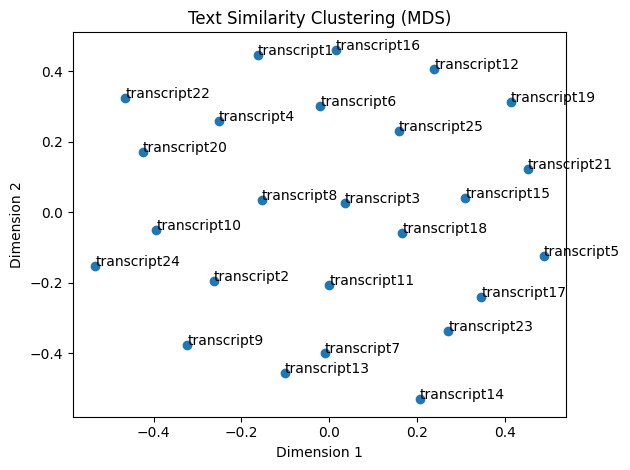

In [111]:
import re
import json
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

# nltk.download('stopwords', download_dir='.') #Uncomment when downloading stopwords file locally
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"[’']", "", w) for w in stop_words} # Remove apostrophes from stopwords
domain_words = {"mongodb", "database", "collection", "document", "cloud", "data", "hi", "hey", "yeah", "like", "zhi", "arjun", "acme corp.", "acme", "atlas"} # Domain specific generic words
stop_words = stop_words | domain_words # combine to one list of stop_words

# global cache for idf memoization
idf_cache = {}  # global cache dictionary


def read_record(filename)->list:
    """Returns a list of all the words in the given transcript"""
    with open(filename, 'r') as file:
        data = json.load(file)
    wordlist =[]
    for sentence in data["transcription_sentences"]:
        wordlist += sentence['text'].split()
    return wordlist

def clean_data(wordlist)->list:
    """
    Takes in a list and returns a copy clean of:
    - Remove punctuation
    - Lowercase all words
    - Remove NLDK stop words and domain specific terminology
    """
    cleaned = []
    for word in wordlist:
        word = word.lower()
        # Used GPT for help formatting RegEx
        word = re.sub(r'[—–-]', ' ', word) # Split em dashes and dashes into separated words
        tokens = word.split() # Handles words that were previously combined with dashes 
        for token in tokens:
                token = re.sub(r'[^\w\s]', '', token)  # Removes punctuation
                # Filter out stopwords and empty strings
                if token and token not in stop_words:
                    cleaned.append(token)
    return cleaned

def get_avg_word_len(wordlist)->float:
    letters = 0
    for word in wordlist:
        letters += len(word)
    return(letters/len(wordlist))

def get_tf(word, record)->float:
    t = 0
    for token in record["text"]:
        if token == word:
            t += 1
    return (t/len(record["text"]))

def get_idf(word, records)->float:
    """
    Computes IDF for given word using dictionary of all transcripts uses
    """
    n = len(records)
    df = 0
    if word in idf_cache:
        return idf_cache[word]

    # Iterate over the records and count words frequency
    for i in range(n):
        for key in records[f"transcript{i+1}.json"]["counts"].keys():
            if key == word:
                df += 1        
    
    value = log((n + 1) / (df + 1)) + 1.0 # IDF equation
    idf_cache[word] = value  # cache result
    return value
    
def get_high_tfidf(record, records):
    """
    This function returns the 3 words in the given record with the highest TFIDF
    """
    tfidf = {}
    for word in set(record['text']):
        if word not in tfidf:
            tfidf[word] = get_tf(word,record) * get_idf(word,records)

    # Used GPT to assist to get descending sorted formatting
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)

    # Return the top 3 as (word, score) tuples
    return sorted_tfidf[:3]
    

def generate_wordclouds(clean_transcripts: dict, output_dir="outputs"):
    """
    Creates and saves a word cloud image for each transcript based on its cleaned text.
    Saves PNGs under the given output_dir. Used GPT to help me format and create the WC PNGs
    """

    for filename, data in clean_transcripts.items():
        # Combine cleaned words into one string
        text = " ".join(data["text"])

        wc = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="viridis",
            max_words=100
        ).generate(text)

        # Save to outputs/
        out_path = os.path.join(output_dir, filename.replace(".json", "_wordcloud.png"))
        wc.to_file(out_path)
        print(f"Saved wordcloud → {out_path}")

def text_similarity_and_mds(clean_transcripts):
    """
    Builds a cosine-similarity matrix from your word counts
    and visualizes the relationships between documents using MDS.
    """
    filenames = sorted(clean_transcripts.keys())

    # --- build vocabulary and document-term matrix ---
    vocab = sorted({w for doc in clean_transcripts.values() for w in doc["counts"].keys()})
    X = np.zeros((len(filenames), len(vocab)))

    for i, fn in enumerate(filenames):
        for word, count in clean_transcripts[fn]["counts"].items():
            X[i, vocab.index(word)] = count

    # --- compute cosine similarity matrix ---
    S = cosine_similarity(X)

    # --- convert to dissimilarity (1 - similarity) ---
    D = 1 - S

    # --- run MDS to map to 2D ---
    coord = MDS(dissimilarity='precomputed', random_state=42).fit_transform(D)

    # --- plot ---
    plt.scatter(coord[:, 0], coord[:, 1])
    for i, fn in enumerate(filenames):
        plt.annotate(fn.replace(".json", ""), (coord[i, 0], coord[i, 1]))
    plt.title("Text Similarity Clustering (MDS)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()


def main():
    # Create dictionaries with wordlists for the transcripts 
    transcripts = {}
    for filename in os.listdir('data'):
        transcripts[filename] = read_record(f"data/{filename}")
    
    # Create dictionaries with cleaned transcript and unique word count
    clean_transcripts = {}
    for key, value in transcripts.items():
        text = clean_data(value)  # Calls the cleaning function
        counts = Counter(text)  # Unique count of cleaned words
        counts = dict(counts.most_common()) # Sorts descendingly
        clean_transcripts[key] = {
            "text": text,
            "counts": counts
        }
    
    # Print Analysis of each document
    for i in range(len(clean_transcripts)):
        print(f"Summary of Transcript {i+1}: \n")
        record = clean_transcripts[f"transcript{i+1}.json"]
        
        # Print Top 10 most common words
        counts = record["counts"]
        top10 = list(counts.items())[:10]
        print(f"Most common words:")
        j = 1
        for word, freq in top10:
            print(f"{j}) {word}: {freq}")
            j += 1
        print()


        # Compute average word length
        wordlength = 0
        for word in record["text"]:
            wordlength += len(word)
        wordlength = wordlength/len(record["text"])
        print(f"The average length of a word is: {wordlength:.2f}\n")
        
        tfidf = get_high_tfidf(record, clean_transcripts)
        print("The Highest TF-IDFs are:")
        j = 1
        for key, value in tfidf:
            print(f"{j}) {key}: {value:.3f}")
            j += 1
            
        print("")

    # generate_wordclouds(clean_transcripts, output_dir="outputs") # Commented out for testing
    text_similarity_and_mds(clean_transcripts)
    

if __name__ == "__main__":
    main()


Summary of Transcript 1: 

Most common words:
1) dynamo: 4
2) teams: 3
3) help: 3
4) adtech: 3
5) migration: 3
6) still: 2
7) good: 2
8) time: 2
9) minutes: 2
10) uh: 2

The average length of a word is: 5.98

The Highest TF-IDFs are:
1) dynamo: 0.056
2) adtech: 0.039
3) bit: 0.026

Summary of Transcript 2: 

Most common words:
1) compliance: 7
2) mysql: 4
3) time: 4
4) thats: 4
5) lot: 3
6) right: 3
7) also: 3
8) sharding: 3
9) plus: 3
10) uh: 2

The average length of a word is: 5.83

The Highest TF-IDFs are:
1) mysql: 0.057
2) sharding: 0.042
3) compliance: 0.031

Summary of Transcript 3: 

Most common words:
1) okay: 3
2) whats: 3
3) thanks: 3
4) workloads: 3
5) thats: 3
6) next: 3
7) time: 2
8) minutes: 2
9) sure: 2
10) lot: 2

The average length of a word is: 5.81

The Highest TF-IDFs are:
1) datas: 0.029
2) dynamo: 0.026
3) modeling: 0.024

Summary of Transcript 4: 

Most common words:
1) uh: 4
2) thanks: 4
3) migration: 4
4) good: 3
5) ai: 3
6) contract: 3
7) time: 2
8) whats: 2


/Users/arjunmasciarelli/Text-Analysis-Project/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


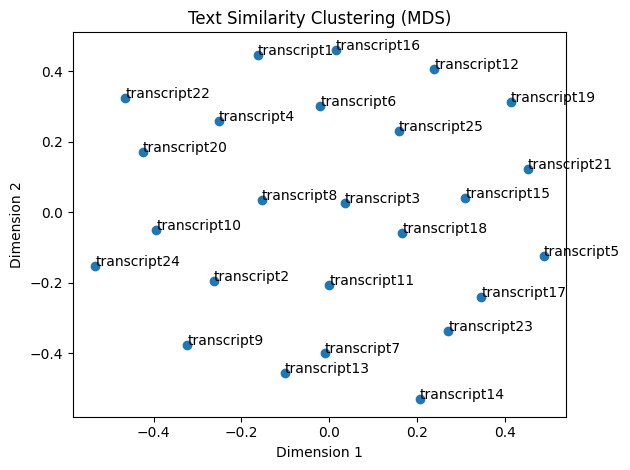

In [113]:
import re
import json
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

# nltk.download('stopwords', download_dir='.') #Uncomment when downloading stopwords file locally
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"[’']", "", w) for w in stop_words} # Remove apostrophes from stopwords
domain_words = {"mongodb", "database", "collection", "document", "cloud", "data", "hi", "hey", "yeah", "like", "uh", "zhi", "arjun", "acme corp.", "acme", "atlas"} # Domain specific generic words
stop_words = stop_words | domain_words # combine to one list of stop_words

# global cache for idf memoization
idf_cache = {}  # global cache dictionary


def read_record(filename)->list:
    """Returns a list of all the words in the given transcript"""
    with open(filename, 'r') as file:
        data = json.load(file)
    wordlist =[]
    for sentence in data["transcription_sentences"]:
        wordlist += sentence['text'].split()
    return wordlist

def clean_data(wordlist)->list:
    """
    Takes in a list and returns a copy clean of:
    - Remove punctuation
    - Lowercase all words
    - Remove NLDK stop words and domain specific terminology
    """
    cleaned = []
    for word in wordlist:
        word = word.lower()
        # Used GPT for help formatting RegEx
        word = re.sub(r'[—–-]', ' ', word) # Split em dashes and dashes into separated words
        tokens = word.split() # Handles words that were previously combined with dashes 
        for token in tokens:
                token = re.sub(r'[^\w\s]', '', token)  # Removes punctuation
                # Filter out stopwords and empty strings
                if token and token not in stop_words:
                    cleaned.append(token)
    return cleaned

def get_avg_word_len(wordlist)->float:
    letters = 0
    for word in wordlist:
        letters += len(word)
    return(letters/len(wordlist))

def get_tf(word, record)->float:
    t = 0
    for token in record["text"]:
        if token == word:
            t += 1
    return (t/len(record["text"]))

def get_idf(word, records)->float:
    """
    Computes IDF for given word using dictionary of all transcripts uses
    """
    n = len(records)
    df = 0
    if word in idf_cache:
        return idf_cache[word]

    # Iterate over the records and count words frequency
    for i in range(n):
        for key in records[f"transcript{i+1}.json"]["counts"].keys():
            if key == word:
                df += 1        
    
    value = log((n + 1) / (df + 1)) + 1.0 # IDF equation
    idf_cache[word] = value  # cache result
    return value
    
def get_high_tfidf(record, records):
    """
    This function returns the 3 words in the given record with the highest TFIDF
    """
    tfidf = {}
    for word in set(record['text']):
        if word not in tfidf:
            tfidf[word] = get_tf(word,record) * get_idf(word,records)

    # Used GPT to assist to get descending sorted formatting
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)

    # Return the top 3 as (word, score) tuples
    return sorted_tfidf[:3]
    

def generate_wordclouds(clean_transcripts: dict, output_dir="outputs"):
    """
    Creates and saves a word cloud image for each transcript based on its cleaned text.
    Saves PNGs under the given output_dir. Used GPT to help me format and create the WC PNGs
    """

    for filename, data in clean_transcripts.items():
        # Combine cleaned words into one string
        text = " ".join(data["text"])

        wc = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="viridis",
            max_words=100
        ).generate(text)

        # Save to outputs/
        out_path = os.path.join(output_dir, filename.replace(".json", "_wordcloud.png"))
        wc.to_file(out_path)
        print(f"Saved wordcloud → {out_path}")

def text_similarity_and_mds(clean_transcripts):
    """
    Builds a cosine-similarity matrix from the word counts and visualizes the relationships between documents using MDS. 
    """
    filenames = sorted(clean_transcripts.keys())
    # DictVectorizer converts list of {term: count} dicts into a CSR matrix fast
    dicts = [clean_transcripts[fn]["counts"] for fn in filenames]
    X = DictVectorizer(sparse=True).fit_transform(dicts)

    D = pairwise_distances(X, metric='cosine')
    coord = MDS(dissimilarity='precomputed', random_state=42).fit_transform(D)

    # --- plot ---
    plt.scatter(coord[:, 0], coord[:, 1])
    for i, fn in enumerate(filenames):
        plt.annotate(fn.replace(".json", ""), (coord[i, 0], coord[i, 1]))
    plt.title("Text Similarity Clustering (MDS)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()


def main():
    # Create dictionaries with wordlists for the transcripts 
    transcripts = {}
    for filename in os.listdir('data'):
        transcripts[filename] = read_record(f"data/{filename}")
    
    # Create dictionaries with cleaned transcript and unique word count
    clean_transcripts = {}
    for key, value in transcripts.items():
        text = clean_data(value)  # Calls the cleaning function
        counts = Counter(text)  # Unique count of cleaned words
        counts = dict(counts.most_common()) # Sorts descendingly
        clean_transcripts[key] = {
            "text": text,
            "counts": counts
        }
    
    # Print Analysis of each document
    for i in range(len(clean_transcripts)):
        print(f"Summary of Transcript {i+1}: \n")
        record = clean_transcripts[f"transcript{i+1}.json"]
        
        # Print Top 10 most common words
        counts = record["counts"]
        top10 = list(counts.items())[:10]
        print(f"Most common words:")
        j = 1
        for word, freq in top10:
            print(f"{j}) {word}: {freq}")
            j += 1
        print()

        # Compute average word length
        wordlength = 0
        for word in record["text"]:
            wordlength += len(word)
        wordlength = wordlength/len(record["text"])
        print(f"The average length of a word is: {wordlength:.2f}\n")
        
        tfidf = get_high_tfidf(record, clean_transcripts)
        print("The Highest TF-IDFs are:")
        j = 1
        for key, value in tfidf:
            print(f"{j}) {key}: {value:.3f}")
            j += 1
            
        print("")

    # generate_wordclouds(clean_transcripts, output_dir="outputs") # Commented out for testing
    text_similarity_and_mds(clean_transcripts)
    

if __name__ == "__main__":
    main()



Summary of Transcript 1: 

Most common words:
1) dynamo: 4
2) teams: 3
3) help: 3
4) adtech: 3
5) migration: 3
6) still: 2
7) good: 2
8) time: 2
9) minutes: 2
10) whats: 2

The average length of a word is: 6.02

The Highest TF-IDFs are:
1) dynamo: 0.057
2) adtech: 0.039
3) bit: 0.026

Summary of Transcript 2: 

Most common words:
1) compliance: 7
2) mysql: 4
3) time: 4
4) thats: 4
5) lot: 3
6) right: 3
7) also: 3
8) sharding: 3
9) plus: 3
10) looking: 2

The average length of a word is: 5.87

The Highest TF-IDFs are:
1) mysql: 0.057
2) sharding: 0.043
3) compliance: 0.032

Summary of Transcript 3: 

Most common words:
1) okay: 3
2) whats: 3
3) thanks: 3
4) workloads: 3
5) thats: 3
6) next: 3
7) time: 2
8) minutes: 2
9) sure: 2
10) lot: 2

The average length of a word is: 5.82

The Highest TF-IDFs are:
1) datas: 0.029
2) dynamo: 0.026
3) modeling: 0.024

Summary of Transcript 4: 

Most common words:
1) thanks: 4
2) migration: 4
3) good: 3
4) ai: 3
5) contract: 3
6) time: 2
7) whats: 2
8

/Users/arjunmasciarelli/Text-Analysis-Project/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


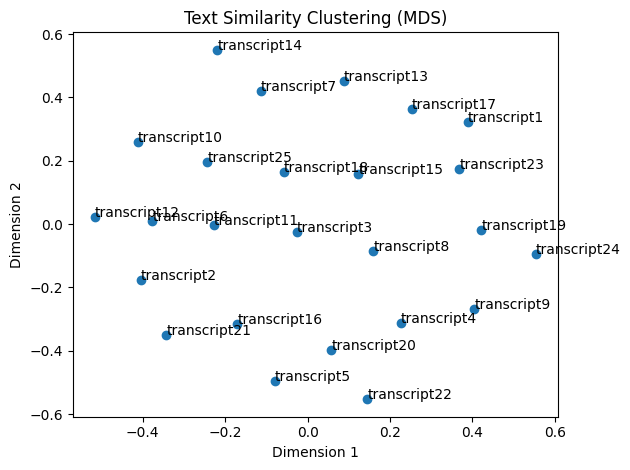

In [114]:
import re
import json
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

# nltk.download('stopwords', download_dir='.') #Uncomment when downloading stopwords file locally
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"[’']", "", w) for w in stop_words} # Remove apostrophes from stopwords
domain_words = {"mongodb", "database", "collection", "document", "cloud", "data", "hi", "hey", "yeah", "like", "uh", "zhi", "arjun", "acme", "corp", "atlas"} # Domain specific generic words
stop_words = stop_words | domain_words # combine to one list of stop_words

# global cache for idf memoization
idf_cache = {}  # global cache dictionary


def read_record(filename)->list:
    """Returns a list of all the words in the given transcript"""
    with open(filename, 'r') as file:
        data = json.load(file)
    wordlist =[]
    for sentence in data["transcription_sentences"]:
        wordlist += sentence['text'].split()
    return wordlist

def clean_data(wordlist)->list:
    """
    Takes in a list and returns a copy clean of:
    - Remove punctuation
    - Lowercase all words
    - Remove NLDK stop words and domain specific terminology
    """
    cleaned = []
    for word in wordlist:
        word = word.lower()
        # Used GPT for help formatting RegEx
        word = re.sub(r'[—–-]', ' ', word) # Split em dashes and dashes into separated words
        tokens = word.split() # Handles words that were previously combined with dashes 
        for token in tokens:
                token = re.sub(r'[^\w\s]', '', token)  # Removes punctuation
                # Filter out stopwords and empty strings
                if token and token not in stop_words:
                    cleaned.append(token)
    return cleaned

def get_tf(word, record)->float:
    return record["counts"][word] / len(record["text"])

def get_idf(word, records)->float:
    """
    Computes IDF for given word using dictionary of all transcripts uses
    """
    n = len(records)
    df = 0
    if word in idf_cache:
        return idf_cache[word]

    # Iterate over the records and count words frequency
    for i in range(n):
        for key in records[f"transcript{i+1}.json"]["counts"].keys():
            if key == word:
                df += 1        
    
    value = log((n + 1) / (df + 1)) + 1.0 # IDF equation
    idf_cache[word] = value  # cache result
    return value
    
def get_high_tfidf(record, records):
    """
    This function returns the 3 words in the given record with the highest TFIDF
    """
    tfidf = {}
    for word in set(record['text']):
        if word not in tfidf:
            tfidf[word] = get_tf(word,record) * get_idf(word,records)

    # Used GPT to assist to get descending sorted formatting
    sorted_tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)

    # Return the top 3 as (word, score) tuples
    return sorted_tfidf[:3]
    

def generate_wordclouds(clean_transcripts: dict, output_dir="outputs"):
    """
    Creates and saves a word cloud image for each transcript based on its cleaned text.
    Saves PNGs under the given output_dir. Used GPT to help me format and create the WC PNGs
    """

    for filename, data in clean_transcripts.items():
        # Combine cleaned words into one string
        text = " ".join(data["text"])

        wc = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="viridis",
            max_words=100
        ).generate(text)

        # Save to outputs/
        out_path = os.path.join(output_dir, filename.replace(".json", "_wordcloud.png"))
        wc.to_file(out_path)
        print(f"Saved wordcloud → {out_path}")

def text_similarity_and_mds(clean_transcripts):
    """
    Builds a cosine-similarity matrix from the word counts and plots the relationships between documents using MDS. 
    """
    filenames = sorted(clean_transcripts.keys())
    
    # Use DictVectorizer to convert list of {term: count} dicts into a "CSR matrix" 
    dicts = [clean_transcripts[fn]["counts"] for fn in filenames] # Used GPT to help construct list comprehension here
    X = DictVectorizer(sparse=True).fit_transform(dicts)

    D = pairwise_distances(X, metric='cosine')
    coord = MDS(dissimilarity='precomputed', random_state=42).fit_transform(D) # Using a random seed to standardize layout 

    # Build and output the plot. Used GPT to help format the produce plot 
    plt.scatter(coord[:, 0], coord[:, 1])
    for i, fn in enumerate(filenames):
        plt.annotate(fn.replace(".json", ""), (coord[i, 0], coord[i, 1]))
    plt.title("Text Similarity Clustering (MDS)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()


def main():
    # Create dictionaries with wordlists for the transcripts 
    transcripts = {}
    for filename in os.listdir('data'):
        transcripts[filename] = read_record(f"data/{filename}")
    
    # Create dictionaries with cleaned transcript and unique word count
    clean_transcripts = {}
    for key, value in transcripts.items():
        text = clean_data(value)  # Calls the cleaning function
        counts = Counter(text)  # Unique count of cleaned words
        counts = dict(counts.most_common()) # Sorts descendingly
        clean_transcripts[key] = {
            "text": text,
            "counts": counts
        }
    
    # Print Analysis of each document
    for i in range(len(clean_transcripts)):
        print(f"Summary of Transcript {i+1}: \n")
        record = clean_transcripts[f"transcript{i+1}.json"]
        
        # Print Top 10 most common words
        counts = record["counts"]
        top10 = list(counts.items())[:10]
        print(f"Most common words:")
        j = 1
        for word, freq in top10:
            print(f"{j}) {word}: {freq}")
            j += 1
        print()

        # Compute average word length
        wordlength = 0
        for word in record["text"]:
            wordlength += len(word)
        wordlength = wordlength/len(record["text"])
        print(f"The average length of a word is: {wordlength:.2f}\n")
        
        tfidf = get_high_tfidf(record, clean_transcripts)
        print("The Highest TF-IDFs are:")
        j = 1
        for key, value in tfidf:
            print(f"{j}) {key}: {value:.3f}")
            j += 1
            
        print("")

    # generate_wordclouds(clean_transcripts, output_dir="outputs") # Commented out for testing
    text_similarity_and_mds(clean_transcripts)
    

if __name__ == "__main__":
    main()
